# Рынок заведений общественного питания 

___
## Описание проекта
___
Кафе будет не совсем в привычном формате, а именно будет выделяться тот факт, что гостей будут обслуживать роботы. Проект будет очень дорогим, но вероятно, успешным. Для инвесторов необходимо оценить ситуацию на рынке заведений общественного питания, насколько кафе окажется популярным, долго ли продлится такая популярность и какова величина конкуренции с другими заведениями. 

___
## Цель исследования
___
Необходимо подготовить исследование рынка. Оценить целесообразность открытия заведения такого типа.

## Подготовка данных

Начнем исследование со знакомства с данными, прочитаем их и запишем в переменную *data*, затем познакомимся с ними с помощью специально подготовленной функции. Также сразу установим и импортируем необходимые библиотеки для работы.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
pd.set_option("max_colwidth", 150)

In [60]:
path = 'уникальный путь к файлу с данными'
rest_data = pd.read_csv(path)

In [61]:
# Функция приводит названия столбцов к "змеиному" регистру и выводит информацию о данных
# Функция может принимать несколько аргументов, поэтому используется синтаксис *args

def info(*datasets):
    for frame in datasets:
        frame.columns = [x.lower().strip().replace(' ', '_') for x in frame.columns.values]
        frame.info()
        display(frame.head())

In [62]:
info(rest_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В нашем распоряжении есть уникальный идентификатор заведения, его название, тот факт, является ли объект сетевым заведением, тип объекта, его адрес и количество посадочных мест внутри. Видим, что пропусков в данных нет, проверим данные на дубликаты.

In [63]:
rest_data.duplicated().sum()

0

Дубликаты отсутствуют. Продублируем столбец chain новым столбцом, но только с булевским типом данных, иными словами для значения "да" в столбце chain значение в новом столбце будет True, в ином случае False.

In [64]:
rest_data['chain_bool'] = rest_data['chain'] == 'да'

## Анализ данных

### Соотношение типов заведений по количеству

Проведем исследовательский анализ данных, для начала исследуем соотношение видов объектов общественного питания по количеству. Построим график методами библиотеки *seaborn*. Будем строить столбчатую диаграмму, где каждый столбец будет соответствовать типу заведения, а значения - количество таких типов. Также разделим данные и по признаку принадлежности к сетевому заведению или нет.

''

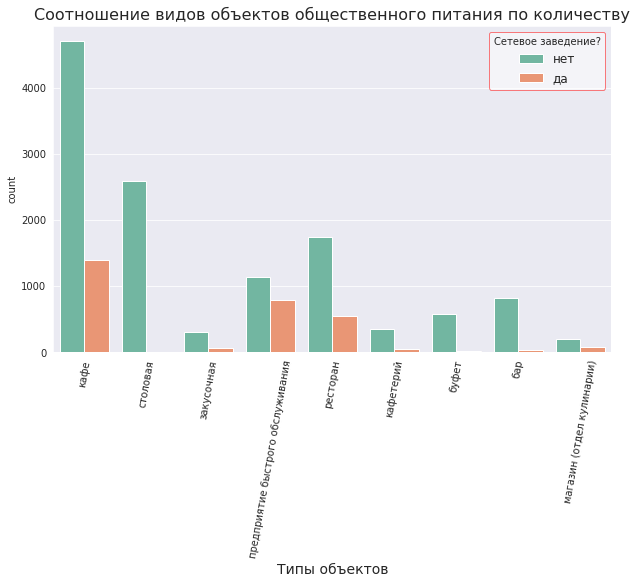

In [65]:
g = sns.countplot(x='object_type', data=rest_data, hue='chain', palette='Set2')
sns.set_style('darkgrid')
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Соотношение видов объектов общественного питания по количеству', fontsize=16)
g.set_xlabel('Типы объектов', fontsize=14)
plt.legend(fontsize=12, framealpha=0.5, title = 'Сетевое заведение?', facecolor='w', edgecolor='r')
;

Видим, что подавляющее большинство заведений носят статус "кафе". Также популярны столовые, рестораны и предприятия быстрого обслуживания. Что касается разделения на сетевые и не сетевые заведения, то во всех случаях преобладают несетевые заведения. Примечательно, что сетевых столовых и буфетов практически не существует. Это может говорить о том, что рынок пестрит различными кафе, барами и т.п. и все они уникальные, что создает определенные сложности в создании дизайна и брендировании, ведь будет очень сложно выделиться из всего этого многообразия.

Также из этого графика можно ответить на следующий вопросы:

 - Для какого вида объекта общественного питания характерно сетевое распространение?
 
Видим, что сетевое распространение наиболее характерно для таких типов как кафе, предприятие быстрого обслуживания и ресторан, что вполне может соответствовать ожиданиям. 

Также построим график, который будет отражать долю сетевых заведений. Для этого создадим новый столбец, который будет являться отношением количества сетевых заведений к несетевым для каждого из типов заведений. Создадим сводную таблицу.

In [66]:
rest_data_pivot = rest_data[['id', 'chain', 'object_type']].pivot_table(index='object_type', 
                                                                        columns='chain', 
                                                                        values='id', aggfunc='nunique').reset_index()
rest_data_pivot['ratio'] = rest_data_pivot['да']/rest_data_pivot['нет']*100

In [67]:
rest_data_pivot = rest_data_pivot.sort_values(by='ratio', ascending=False)
rest_data_pivot.head(5)

chain,object_type,да,нет,ratio
6,предприятие быстрого обслуживания,791,1132,69.876325
5,магазин (отдел кулинарии),78,195,40.000000
7,ресторан,544,1741,31.246410
3,кафе,1396,4703,29.683181
2,закусочная,56,304,18.421053


''

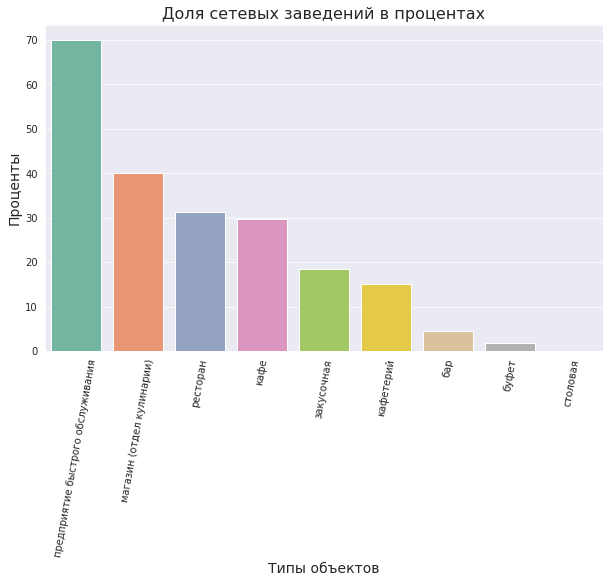

In [68]:
g = sns.barplot(x='object_type', y='ratio', data=rest_data_pivot, palette='Set2')
sns.set_style('darkgrid')
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Доля сетевых заведений в процентах', fontsize=16)
g.set_xlabel('Типы объектов', fontsize=14)
g.set_ylabel('Проценты', fontsize=14)
;

Теперь более ясно видно, что для предприятий быстрого обслуживаний доля сетевых заведений наиболее высокая, около 70 процентов.

### Распределение числа посадочных мест, среднее количество мест

Теперь выясним следующий поинт, а именно что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Ответим на этот вопрос с помощью сравнения сетевых и несетевых заведений.

Для этого сначала создадим срез, куда войдут только сетевые заведения. Так же исключим заведения не указанные в выводе выше. Таким образом в срез войдут только 3 типа заведений - кафе, предприятие быстрого обслуживания и ресторан. Будем изучать этот вопрос на примере именно этих трех заведений в связи с их преобладающей популярностью.

Построим график распределения типа *stripplot*, где по оси x будут располагаться категории, в нашем случае - 3 типа заведений, по оси y будут располагаться значения количества посадочных мест. Воспользуемся соответствующей функцией библиотеки seaborn.

Проделаем тоже самое и для несетевых заведений тех же типов.

In [69]:
# Срез данных
rest_chain = rest_data[np.logical_and(rest_data['chain'] == 'да', 
                        rest_data['object_type'].isin(['кафе', 'предприятие быстрого обслуживания', 'ресторан']))]

rest_no_chain = rest_data[np.logical_and(rest_data['chain'] == 'нет', 
                        rest_data['object_type'].isin(['кафе', 'предприятие быстрого обслуживания', 'ресторан']))]

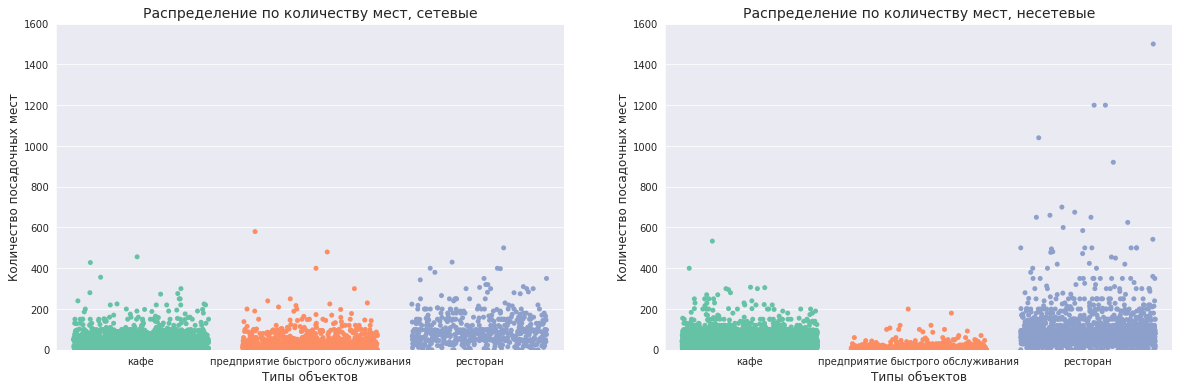

''

In [70]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
g = sns.stripplot(x='object_type', y='number', jitter=0.4, data=rest_chain, palette='Set2')
sns.set_style('darkgrid')
g.set(ylim=(0, 1600))
g.set_title('Распределение по количеству мест, сетевые', fontsize=14)
g.set_xlabel('Типы объектов', fontsize=12)
g.set_ylabel('Количество посадочных мест', fontsize=12)

plt.subplot(1, 2, 2)
g = sns.stripplot(x='object_type', y='number', jitter=0.4, data=rest_no_chain, palette='Set2')
sns.set_style('darkgrid')
g.set(ylim=(0, 1600))
g.set_title('Распределение по количеству мест, несетевые', fontsize=14)
g.set_xlabel('Типы объектов', fontsize=12)
g.set_ylabel('Количество посадочных мест', fontsize=12)

plt.show()
;

В сравнении сетевых и несетевых заведений разницы практически не наблюдается среди кафе, среди предприятий быстрого обслуживания сетевых заведений с большим числом посадочных мест больше, чем несетевых. Несетевые рестораны же напротив, представлены в большем количестве по большому числу посадочных мест в сравнении с сетевыми. Это вполне логично, ведь сетевые заведения создаются в том числе с целью открытия большего количества точек в разных местах города.

Теперь сравним рассматриваемые категории заведений внутри только сетевого среза, для этого построим аналогичный график.

''

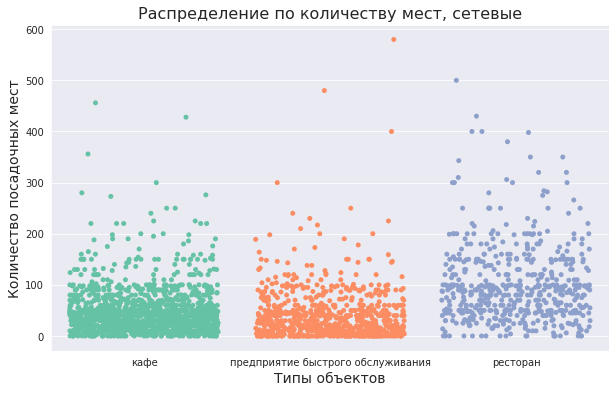

In [71]:
g = sns.stripplot(x='object_type', y='number', jitter=0.4, data=rest_chain, palette='Set2')
sns.set_style('darkgrid')
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
g.set_title('Распределение по количеству мест, сетевые', fontsize=16)
g.set_xlabel('Типы объектов', fontsize=14)
g.set_ylabel('Количество посадочных мест', fontsize=14)
;

Вследствии большого количества данных и схожей картины распределения посадочных мест сложно уловить явное преобладание определенной категории, но все же на первый взгляд для ресторанов характерно большее количество посадочных мест, к тому же учитывая тот факт, что ресторанов меньше всего, в случае рассмотрения этих трех типов, то это вполне логично.

Построим также графики распределения значений числа посадочных мест и сравним все три типа заведений на одном графике. Сделаем это с помощью функции kdeplot для сетевых и несетевых заведений.

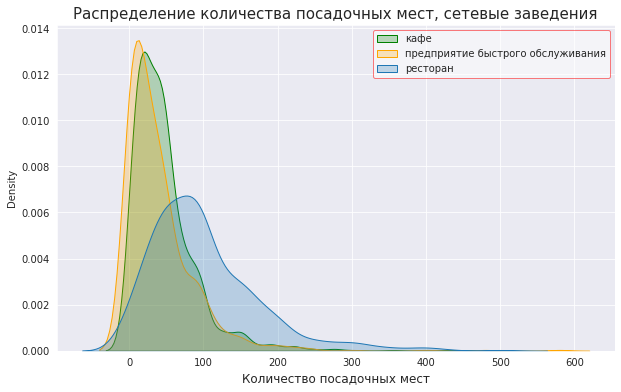

''

In [72]:
plt.figure(figsize=(10, 6))

plt.title('Распределение количества посадочных мест, сетевые заведения', fontsize=15)
plt.xlabel('Количество посадочных мест', fontsize=12)
sns.kdeplot(rest_chain[rest_chain['object_type'] == 'кафе']['number'], shade=True, color='g', label='кафе')
sns.kdeplot(rest_chain[rest_chain['object_type'] == 'предприятие быстрого обслуживания']['number'], 
            shade=True, color='orange', label='предприятие быстрого обслуживания')
sns.kdeplot(rest_chain[rest_chain['object_type'] == 'ресторан']['number'], shade=True, label='ресторан')
plt.legend(fontsize=10, framealpha=0.5, facecolor='w', edgecolor='r')
plt.show()
;

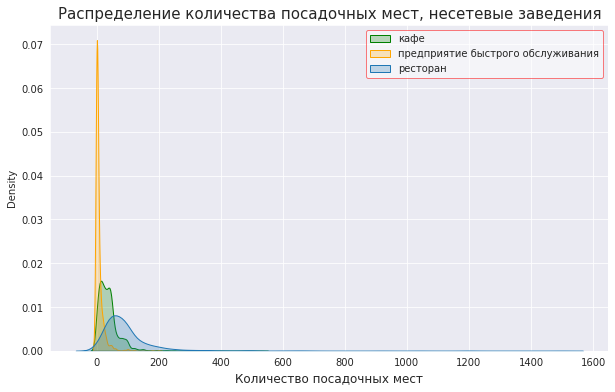

''

In [73]:
plt.figure(figsize=(10, 6))

plt.title('Распределение количества посадочных мест, несетевые заведения', fontsize=15)
plt.xlabel('Количество посадочных мест', fontsize=12)
sns.kdeplot(rest_no_chain[rest_no_chain['object_type'] == 'кафе']['number'], shade=True, color='g', label='кафе')
sns.kdeplot(rest_no_chain[rest_no_chain['object_type'] == 'предприятие быстрого обслуживания']['number'], 
            shade=True, color='orange', label='предприятие быстрого обслуживания')
sns.kdeplot(rest_no_chain[rest_no_chain['object_type'] == 'ресторан']['number'], shade=True, label='ресторан')
plt.legend(fontsize=10, framealpha=0.5, facecolor='w', edgecolor='r')
plt.show()
;

Видим, что для сетевых заведений для типов "кафе" и "предприятие быстрого обслуживание" разницы практически нет, для ресторанов же больше заведений с большим количеством посадочных мест, что подтверждает выводы, сделанные выше из графиков *stripplot*.

Что касается несетевых заведений, в данном случае резко выделяются предприятия быстрого обслуживания, тем фактом, что имеют наибольшее число заведений с малым количеством посадочных мест, что может говорить о том, что несмотря на то, что таких заведений много (больше чем сетевых этого типа), все же все они имеют небольшой масштаб. Для кафе и ресторанов распределения практически совпадают с соответствующими типами сетевых аналогов.

Таким образом, делаем вывод, что у сетевых заведений нет характерных особенностей для типа кафе, для типа предприятия быстрого обслуживания для сетевого заведения характерно большее количество посадочных мест при меньшей численности заведений. Для несетевых - заведений намного больше, но число посадочных мест меньше.

Для несетевых ресторанов характерно большее количество посадочных мест, при большем количестве заведений.  

Далее более точно вычислим и отсортируем заведения по количеству посадочному мест, иными словами для каждого вида объекта общественного питания вычислим среднее количество посадочных мест. Построим соответствующие графики, в данном случае также разделим заведения на сетевые и несетевые, воспользуемся ранее созданными срезами rest_chain, rest_no_chain.

''

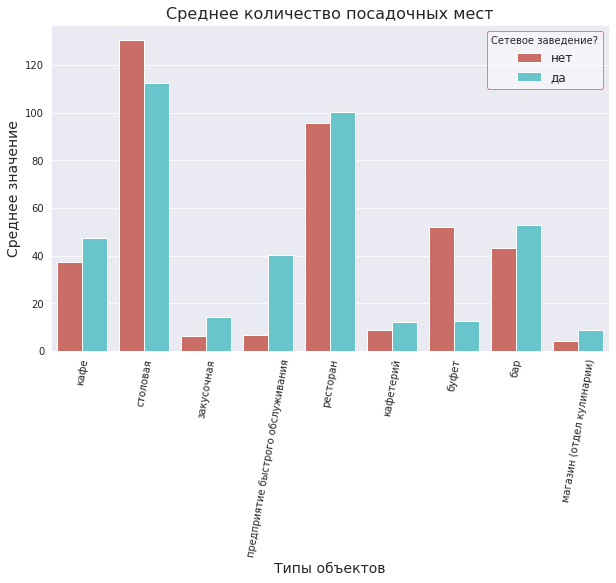

In [74]:
g = sns.barplot(x='object_type', y='number', data=rest_data, hue='chain', palette='hls', ci=None)
sns.set_style('darkgrid')
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Среднее количество посадочных мест', fontsize=16)
g.set_xlabel('Типы объектов', fontsize=14)
g.set_ylabel('Среднее значение', fontsize=14)
plt.legend(fontsize=12, framealpha=0.5, title = 'Сетевое заведение?', facecolor='w', edgecolor='r')
;

Получаем вполне ожидаемый результат, касаемый того, что именно такой тип заведения как столовая имеет наибольшее среднее количество посадочных мест, что вполне логично, ведь такое заведение вероятно и задумывалось как место массового питания. 

После столовой идут рестораны, затем бары и кафе. Также важно отметить тот факт, что во всех случаях кроме столовой и буфета (не удивительно, редко где можно встретить какую-нибудь сеть буфетов) количество посадочных мест больше именно в сетевых заведениях. Действительно, крупные брендированные общепиты заточены под максимальную прибыль и поэтому стремяться посадить как можно больше людей в свои залы, также это может быть связано с большей известностью или популярностью сетевых заведений. 

### Получение названия улиц, загрузка дополнительных данных

Теперь исследуем как распределены заведения по улицам Москвы, определим топ-10 улиц с наибольшим количеством заведений на них, также улицы с всего 1 заведением на них, определим районы, где находятся эти улицы. 

Для этого сначала выделим названия улиц в отдельный столбец *street*. Так как информация в столбце адреса записана в формате таком, что каждый элемент адреса разделен запятой, то воспользуемся методом *split* для разделения строки с адресом на части, в качестве разделителя использую запятую и в конечном итоге выделим второй элемент из получившегося картежа элементов (с индексом 1). Проделаем это с помощью лямбда функции, которую применим к каждой строки столбца *address* с помощью метода *apply*.

In [75]:
# Применяем лямбда функцию к каждой из строк столбца address с помощью метода apply
# Также удалим возможные пробелы в начале и в конце получившейся строки с названием улицы методом strip

rest_data['street_name'] = rest_data['address'].apply(lambda x: x.split(',')[1])
rest_data['street_name'] = rest_data['street_name'].str.strip()

rest_data[['address', 'street_name']].head(5)

,address,street_name
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица


In [76]:
# Получим наиболее часто встречающиеся 5 улиц
rest_data['street_name'].value_counts().head()

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Name: street_name, dtype: int64

Мы получили названия улиц из столбца с адресом, но видим, что лидирует улица "город Зеленоград", что на самом деле является городом, поэтому по сумме всех улиц с заведением он получается первый. Так как мы проводим исследование только в рамках москвы далее будем использовать данные без строк с адресами из Зеленограда. 

Теперь создадим еще один столбец с названием района Москвы, где находится рассматриваемая улица.

Для этого загрузим данные по улицам и соответствующим им районам Москвы по ссылке из документа в гугл таблицах, опубликованного в интернете.

In [77]:
districts = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTyXTqbMPLgAXQnI3ePqXTBnFAhLYpL5JM2kqO5d-i5v_EH2fk2UVwfGYf-JezdoDZ7PLPdV2RCIm4J/pub?output=csv')
districts = districts[['streetname', 'area']]
districts = districts.drop_duplicates(subset=['streetname'])
districts.head()

,streetname,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район


In [78]:
# Посмотрим, сколько в общем получилось улиц
districts.shape

(3604, 2)

Таким образом мы удалили дубликаты только по столбцу *streetname*, для того, чтобы избежать повторений при объединении таблиц. Иными словами в таблице districts теперь данные о тех улицах, которые находятся только в одном районе.


Теперь необходимо добавить новый столбец в таблицу rest_data с информацией по названию района, в котором находится рассматриваемая улица. Сделаем это путем объединения таблиц по столбцу street_name с помощью метода *merge*.

Также предварительно исключим записи в таблице rest_data с адресами из Зеленограда, как уже уточнялось выше.

In [79]:
rest_data = rest_data.query('street_name != "город Зеленоград"')

Сначала объеденим таблицы с помощью типа объеденения *left*, чтобы посмотреть, сколько адресов останутся без информации о районе. По сути это будут именно те адреса, улицы которых пересекают два и более районов, а так как информацию строки с такими улицами мы удалили из districts, то очевидно для этих адресов в rest_data не будет информации о районе, проверим, сколько таких записей.

In [80]:
districts = districts.rename(columns={'streetname': 'street_name'})
rest_merged_data = rest_data.merge(districts[['street_name', 'area']], on=['street_name'], how='left')
rest_merged_data.head()

,id,object_name,chain,object_type,address,number,chain_bool,street_name,area
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False,улица Егора Абакумова,Ярославский Район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина,Таганский район
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False,Абельмановская улица,Таганский район
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,True,Абрамцевская улица,Район Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False,Абрамцевская улица,Район Лианозово


In [81]:
rest_merged_data['area'].isna().sum()

836

Получаем, что 836 заведений, находятся на улицах, которые пересекают 2 и более районов.

### 3 Распределение количества заведений по улицам Москвы

Построим график топ-10 улиц по количеству объектов общественного питания, так же определим к какому району относятся полученные улицы.

Для этого сгруппируем данные по улицам и посчитаем количество уникальных объектов для каждой улицы.

In [82]:
top_street = rest_merged_data.groupby(['street_name', 
                                          'area']).agg({'id': 'nunique'}).reset_index().sort_values(by='id', 
                                                                                                    ascending=False)

top_street = top_street.rename(columns={'id': 'count'})
top_10_street = top_street.head(10)
top_10_street

,street_name,area,count
1342,проспект Мира,Алексеевский район,204
961,Профсоюзная улица,Академический район,182
657,Ленинградский проспект,Район Аэропорт,171
947,Пресненская набережная,Пресненский район,167
383,Варшавское шоссе,Район Чертаново Центральное,161
660,Ленинский проспект,Район Проспект Вернадского,147
1340,проспект Вернадского,Район Проспект Вернадского,132
648,Кутузовский проспект,Район Дорогомилово,114
575,Каширское шоссе,Район Москворечье-Сабурово,112
580,Кировоградская улица,Район Чертаново Центральное,110


''

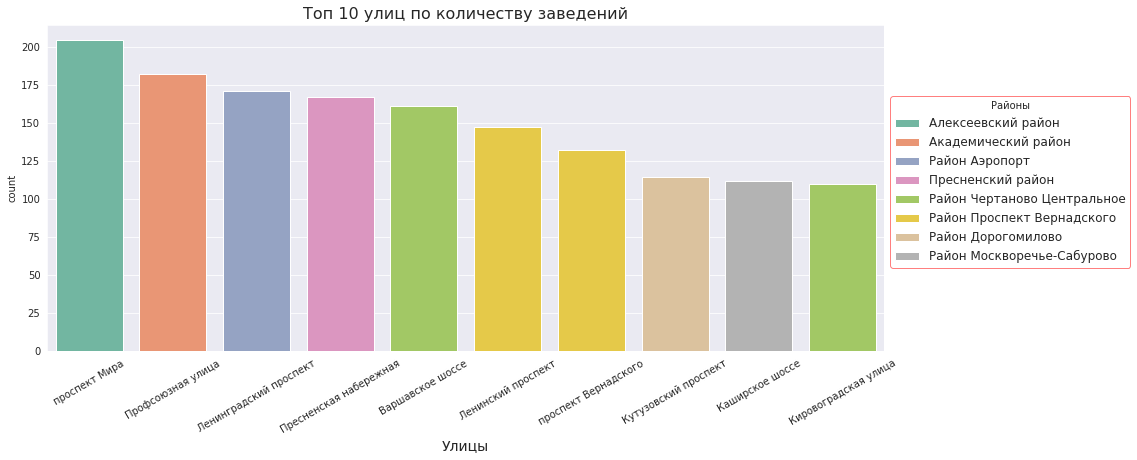

In [83]:
g = sns.barplot(x='street_name', y='count', data=top_10_street, hue='area', palette='Set2', dodge=False)
sns.set_style('darkgrid')
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title('Топ 10 улиц по количеству заведений', fontsize=16)
g.set_xlabel('Улицы', fontsize=14)
plt.legend(fontsize=12, framealpha=0.5, title = 'Районы', facecolor='w', edgecolor='r', bbox_to_anchor=(1, 0.8))
;

Получаем, что самой загруженной улицей является проспект Мира, которая находится в Алексеевском районе. 

Теперь посчитаем количество улиц с 1 объектом общественного питания, также выведем в качестве примера 10 таких улиц с названием и районом, к которому они относятся.

In [84]:
street_one = top_street.query('count == 1')
street_one

,street_name,area,count
1764,улица Шумилова,Район Кузьминки,1
9,1-й Голутвинский переулок,Район Якиманка,1
165,3-я Новоостанкинская улица,Останкинский район,1
1653,улица Пивченкова,Район Фили-Давыдково,1
163,3-я Железногорская улица,Район Южное Бутово,1
...,...,...,...
1261,Электрический переулок,Пресненский район,1
602,Конаковский проезд,Головинский район,1
98,2-й Лучевой просек,Район Сокольники,1
99,2-й Магистральный тупик,Хорошевский район,1


Получаем, что существует 517 улиц всего с 1 объектом общественного питания, причем, к примеру 3-я Новоостанкинская улица, находится в Останскинском районе, что даже в пределах Третьего Транспортного кольца. 517 улиц составляют приблизительно 1/7 часть от всех улиц. Это говорит о том, что в целом рынок еще не очень насыщен, и можно найти не мало улиц, где совершенно отсутствуют заведения определенного типа. 

### Распределение посадочных мест относительно улиц

Теперь посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Воспользуемся также в качестве примера топ-10 улицами, которые были определены выше и храняться в таблице top_10_street. Создадим соответствующий срез.

Визуализируем распределение с помощью типа графика stripplot библиотеки seaborn.

In [85]:
rest_merged_data_top_10 = rest_merged_data[rest_merged_data['street_name'].isin(top_10_street['street_name'])]

''

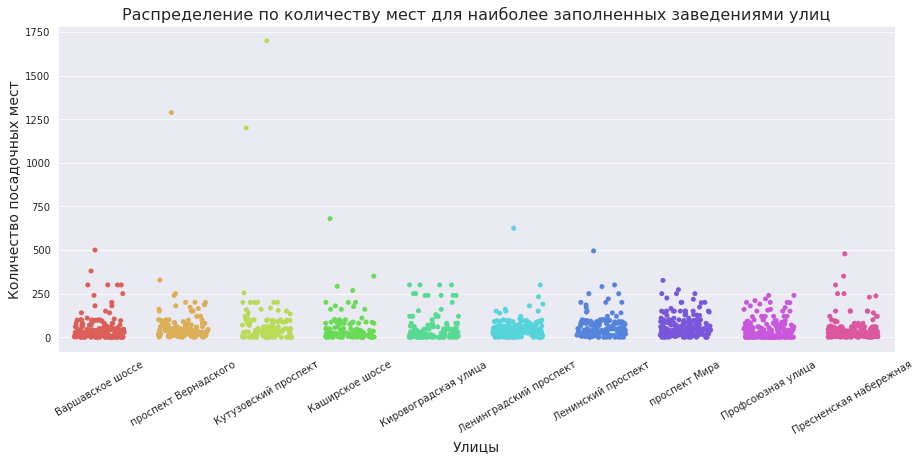

In [86]:
g = sns.stripplot(x='street_name', y='number', jitter=0.3, data=rest_merged_data_top_10, palette='hls')
sns.set_style('darkgrid')
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title('Распределение по количеству мест для наиболее заполненных заведениями улиц', fontsize=16)
g.set_xlabel('Улицы', fontsize=14)
g.set_ylabel('Количество посадочных мест', fontsize=14)
;

Из получившийся диаграммы видим, что распределение по количеству мест у самых наполненных заведениями улиц очень схоже. На всех 10 улицах основной массив значений находится в пределах от 0 до 250 посадочных мест. Также видно, что большая часть этих значений находится в пределах от 0 до 100-150 мест. Это может говорить о том, что вероятно на этих улицах находится много сетевых заведений, где, как мы ранее выяснили сравнительно мало посадочных мест. Также это может объясняться тем фактом, что из-за большого количества заведений может банально не хватать арендуемой площади для больших залов.

"Зуммируемся" на этом графике, чтобы более детально рассмотреть распределения, вероятно найдутся какие-либо стандартные значения количества посадочных мест.

Для этого из данных для графика удалим все заведения, где более 250 посадочных мест.

''

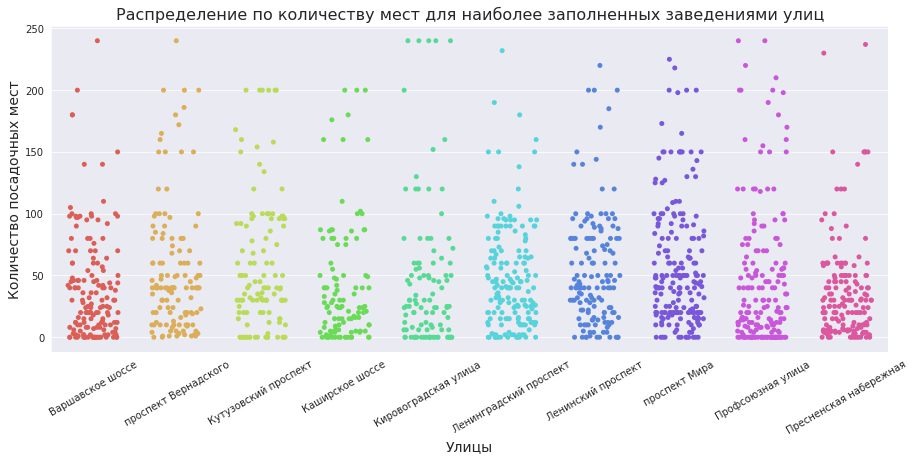

In [87]:
g = sns.stripplot(x='street_name', 
                  y='number', 
                  jitter=0.3, 
                  data=rest_merged_data_top_10[rest_merged_data_top_10['number'] < 250], 
                  palette='hls')
sns.set_style('darkgrid')
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title('Распределение по количеству мест для наиболее заполненных заведениями улиц', fontsize=16)
g.set_xlabel('Улицы', fontsize=14)
g.set_ylabel('Количество посадочных мест', fontsize=14)
;

В целом видим вполне ожидаемую картину без каких-либо выделяющихся значений, в данном случае заведений с меньшим количеством посадочных мест более тех, где мест больше, но также можно заметить, что 100 мест является довольно заметной границей, по каждую сторону от которой количество заведений значительно различается. 

Дело в том, что согласно СНиП 2.08.01-89 и еще ряду других предписывающий норм, касающихся организации предприятий общественного питания существует ряд требований к заведениям, а именно:

 - Базироваться в общественно-жилых зданиях, вокзалах и торговых центрах могут небольшие кофейные заведения, с числом рабочих мест до 50 человек. При этом полная площадь организации не может превышать 700 квадратов.
 
 - Небольшие и средние кафе могут быть:
   - общего типа с количеством посадочных мест от 50 до 200 человек;
   - специализированные с чуть меньшим количеством мест (от 25 до 100).
   
К последним относят кафе семейного типа, кафе-бистро, кафе-столовые, кафе-чайные, кофейни, кафе-мороженные, детские заведения, кафе самообслуживания и другие.

Это вполне объясняет, что большинство кафе, ресторанов и других типов заведений ограничены по площади и как следствие по количеству посадочных мест, так как чаще всего они размещаются именно в жилых домах.

### Итоговый вывод

Подводя итог, можно следать следующие выводы и рекомендации:

 - В Москве наиболее популярны такие типы заведений как кафе, рестораны, предприятия быстрого обслуживания а также большое количество несетвых столовых (вероятно в данном случае в счет идут в том числе столовые школ и университетов, поэтому получается такое большое количество)
 - По количеству преобладают несетевые заведения.
 - Важным параметром является распределение в зависимости от посадочных мест. Здесь ситуация следующая:
 
   - У сетевых заведений нет характерных особенностей для типа кафе 
   - Для типа предприятия быстрого обслуживания для сетевого заведения характерно большее количество посадочных мест при меньшей численности заведений. 
   - Для несетевых - заведений намного больше, но число посадочных мест меньше.
   - Для несетевых ресторанов характерно большее количество посадочных мест, при большем количестве заведений.
    
Также в исследовании были выделены наиболее загруженные улицы и приведена информация о том, в каком районе города находятся такие улицы. Был определен и список всех улиц со всего 1 заведением на них расположенном, а также приведен тот факт, что такие улицы составляют около 1/7 от всех рассматриваемых улиц. 

На основе этих выводов можно сделать следующие рекомендации:

 - Так как текущая цель заключается в открытии именно кафе, то нужно учесть тот факт, что это самое насыщенное конкуренцией из всех типов заведение, причем и сетевых и несетевых. Поэтому стоит рассмотреть открытие кафе на наименее конкурентных улицах, к примеру из получившегося выше списка. Но важно также учесть район, где находится такая улица, ведь там может быть мало заведений-конкурентов, но также и небольшое количество население, то есть потенциальных клиентов. Вероятно стоит выбрать в первую очередь более густонаселенные улицы.
 - Важным фактором является и количество посадочных мест. Было выяснено, что кафе имеют в среднем около 50 посадочных мест, что в том числе продиктовано эпидимеологическими нормами. Так как кафе предполагается в необычном формате, а именно такое, что вместо официантов поситетелй будут обслуживать роботы, то будет важен фактор вместимости в кафе, то есть оно должно иметь большое количество посадочных мест. Такое кафе не получится разместить в жилом доме, поэтому необходимо изучить подходящие места для аренды, при этом сопоставляя их с местонахождением похожих больших заведений.
 - Учитывая тот факт, что для несетвых заведений характерно меньшее число посадочных мест, то предполагаемое кафе будет выделяться еще сильнее, что вполне можно считать преимуществом.